In [2]:
import utils
import matplotlib.pyplot as plt
import numpy as np

figure_count = 0
def figure_num():
    global figure_count
    figure_count += 1
    return figure_count

显示图片
readRaw函数将.raw格式读入,图片自动转换为一个numpy矩阵。
注:这个raw格式的存储的每个字节是这样的:
width,height,gray,...,gray

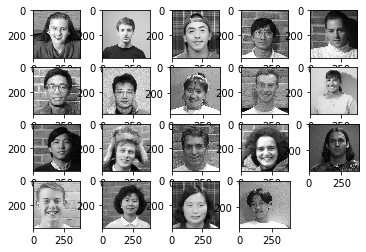

In [3]:
def toInt(bytstr):
    return int.from_bytes(bytstr,byteorder='little', signed=False)

def readRaw(path):
    with open(path,'rb') as f:
        w,h = f.read(4),f.read(4)
        w,h = toInt(w),toInt(h)

        res = np.frombuffer(f.read(),dtype=np.uint8)
        res = res.reshape((h,w))

        # print(res.shape)
        return res

raw = readRaw('../imgs/raws/FILE.raw')
plt.imshow(raw,cmap='gray')

plt.figure(1)
for i in range(1,20):
    plt.subplot(4,5,i)
    raw = readRaw('../imgs/raws/FILE%d.raw'%i)
    plt.imshow(raw,cmap='gray')


绘制灰度直方图,即横坐标是灰度图片的0-255灰度值,灰度值也被称作灰度级,纵坐标是对应的灰度像素的个数,plot.hist可以自行统计这一过程。

灰度变换-函数:
M表示灰度图片的矩阵,Mij表示其对应位置的像素点。
Y = f(M) || yij = f(Mij)
其中Y是变换后的矩阵,M是原来的图像矩阵。yij是变换后像素点的灰度值,Mij是变换前的灰度值。

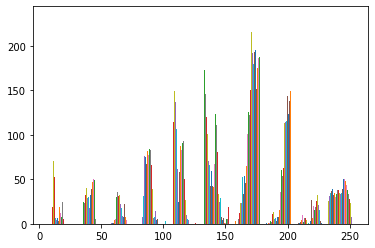

In [4]:
plt.hist(raw,bins=10)
plt.show()

1.线性变换
1.1直线

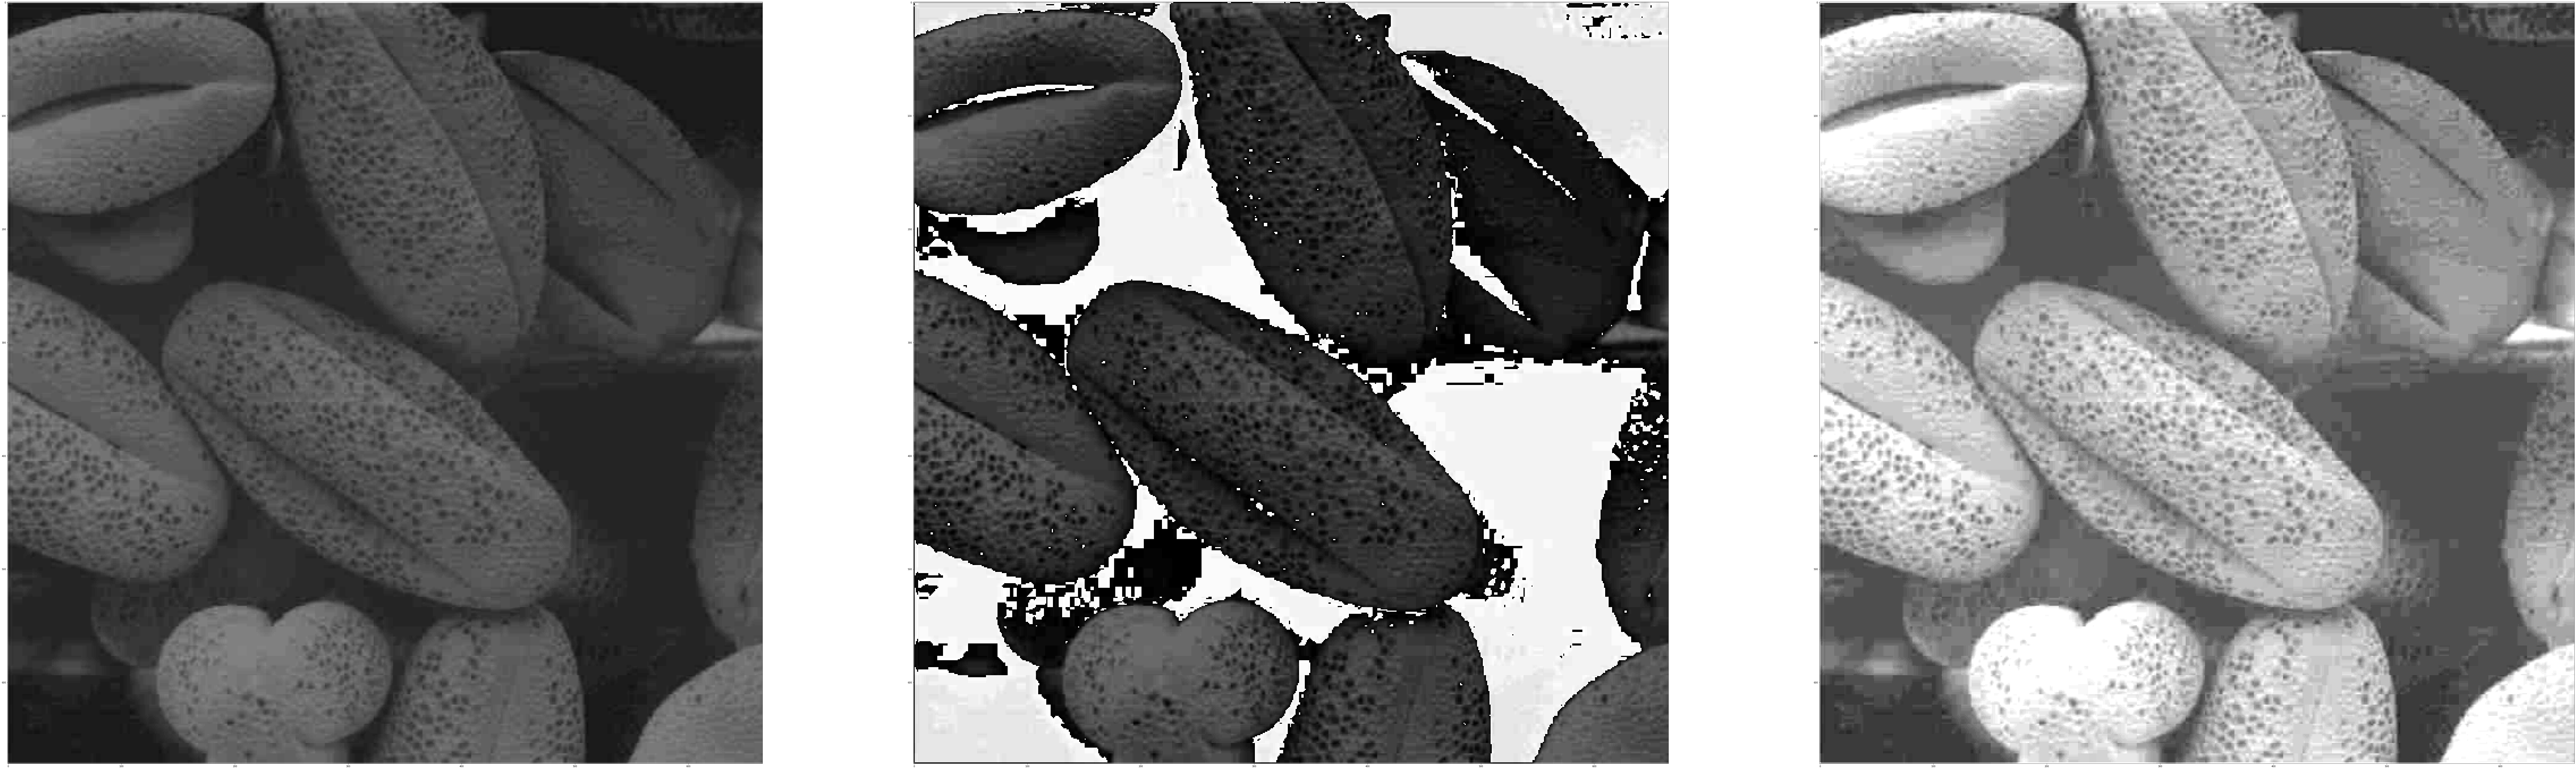

In [17]:
def f_linear(M,a,b):
    return a * M + b

import cv2
raw=cv2.imread('../imgs/c2/cells.png',0)

#原图
plt.figure(1,figsize=(200,200))
plt.subplot(1,3,1)
plt.imshow(raw,cmap='gray')

#线性
plt.subplot(1,3,2)
plt.imshow(f_linear(raw,4,2),cmap='gray')

#分段
plt.subplot(1,3,3)
def f_sub_linear(M,a,b):
    h,w = M.shape
    l = h * w
    res = M.reshape((1,l))
    # print(res.shape)
    for i in range(l):
        if (b < res[0,i]) or (res[0,i] < a):
            #灰度压缩*0.45
            res[0,i] = res[0,i] * 0.2
        else:
            #灰度拉伸*2
            res[0,i] = res[0,i] * 1.7 if res[0,i] * 1.7 <= 255 else 255
    res = res.reshape((h,w))
    return res

plt.imshow(f_sub_linear(raw,100,220),cmap='gray')

1.2对数变换

In [32]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

raw=cv2.imread('../imgs/c2/logfsample.png',0)

#原图
plt.figure(2,figsize=(200,200))
plt.subplot(1,2,1)
plt.imshow(raw,cmap='gray')

#对数变换
plt.subplot(1,2,2)
#f = c * log(1+Mij)
raw_lf = 1 * np.log(1+raw)

#rescale the value to [0-255]
#将所有值归一化后回归[0-255]区间
raw_lf = 255 * (raw_lf - np.min(raw_lf)) / (np.max(raw_lf) - np.min(raw_lf))
raw_lf = raw_lf.astype(np.int)

plt.imshow(raw_lf,cmap='gray')

[[71 49 58 ... 31 19 27]
 [ 5 31 55 ... 63 76 86]
 [74 79 76 ... 23 35 66]
 ...
 [58 45 38 ... 63 49 49]
 [63 52 42 ... 61 49 45]
 [69 63 55 ... 61 52 55]]


2.3幂次变换

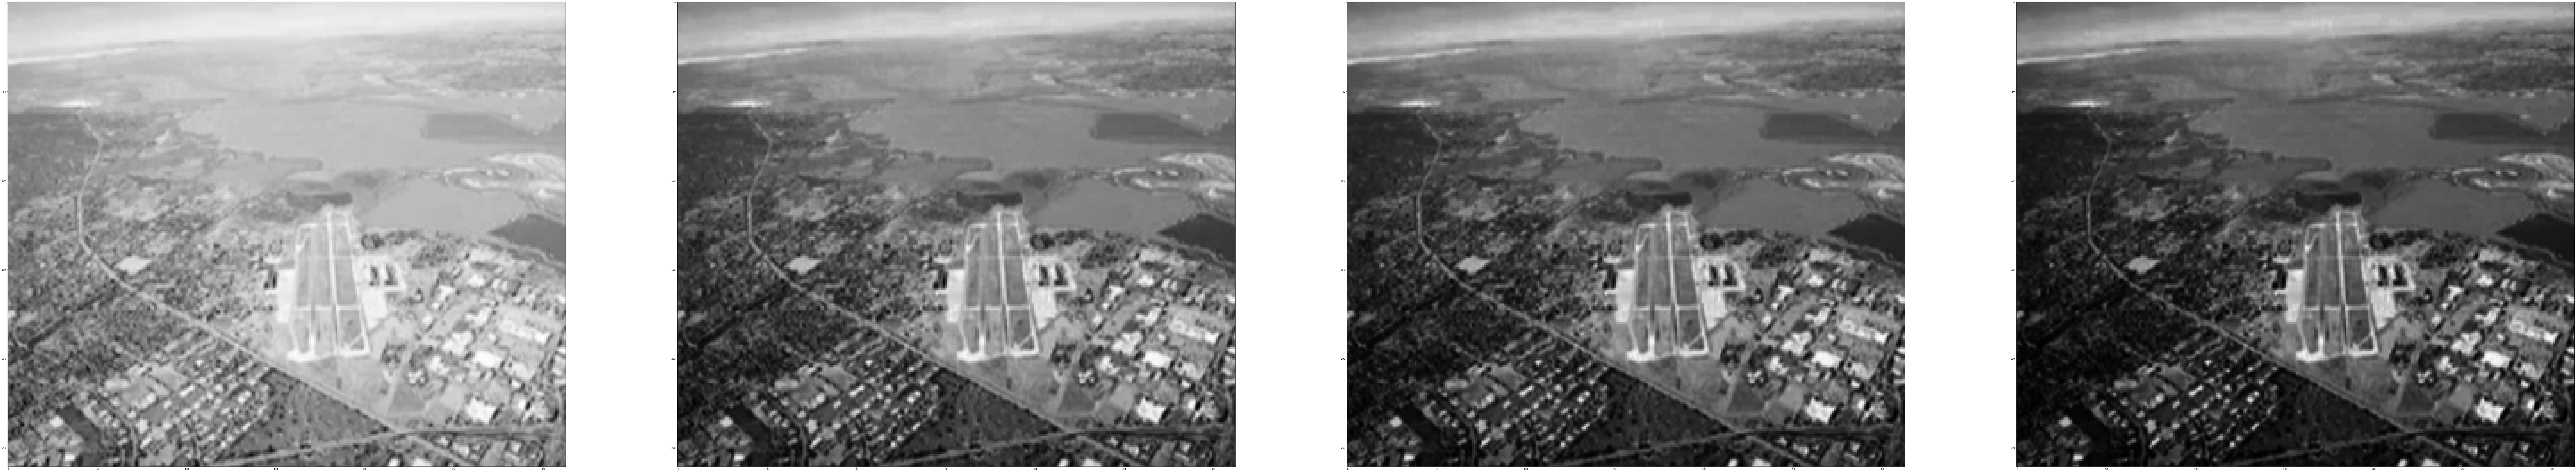

In [33]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

raw=cv2.imread('../imgs/c2/powerfsample.png',0)
#图片是截屏的所以需要乘0.2模仿ppt的灰白效果
raw=raw * 0.2
#原图
plt.figure(3,figsize=(200,200))
plt.subplot(1,4,1)
plt.imshow(raw,cmap='gray')

#幂次变换y=3,y=4,y=5
for i in range(2,5):
    plt.subplot(1,4,i)
    plt.imshow(raw ** (i+1),cmap='gray')